# Importing Library

In [55]:
import pandas as pd
import numpy as np

# Dataset Import

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df= pd.read_csv('/content/drive/MyDrive/DM_Lab/titanic_train.csv')
df.head(5)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [58]:
df.drop(['passenger_id','sibsp','parch','ticket','embarked','home.dest','body'],inplace=True,axis=1)

In [59]:
df.head(5)

,pclass,name,sex,age,fare,cabin,boat,survived
0,3,"Smyth, Miss. Julia",female,NaN,7.7333,NaN,13,1
1,3,"Cacic, Mr. Luka",male,38.0,8.6625,NaN,NaN,0
2,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,24.1500,NaN,NaN,0
3,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,23.0000,NaN,4,1
4,2,"Veal, Mr. James",male,40.0,13.0000,NaN,NaN,0


# Handel Missing Value

In [60]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,174
fare,1
cabin,659
boat,542
survived,0


In [61]:
df['age'].fillna(df['age'].mean(), inplace=True)

<ipython-input-61-15e9ed7dc05b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [62]:
df['age'].isnull().sum()

0

In [63]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with strategy='most_frequent' for non-numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Select numeric and categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Apply imputers to respective columns
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

print("\nData after handling missing values:")
print(df.head())


Data after handling missing values:
   pclass                                               name     sex  \
0     3.0                                 Smyth, Miss. Julia  female   
1     3.0                                    Cacic, Mr. Luka    male   
2     3.0  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...  female   
3     2.0              Hocking, Mrs. Elizabeth (Eliza Needs)  female   
4     2.0                                    Veal, Mr. James    male   

         age     fare            cabin boat  survived  
0  29.519847   7.7333  B57 B59 B63 B66   13       1.0  
1  38.000000   8.6625  B57 B59 B63 B66    4       0.0  
2  30.000000  24.1500  B57 B59 B63 B66    4       0.0  
3  54.000000  23.0000  B57 B59 B63 B66    4       1.0  
4  40.000000  13.0000  B57 B59 B63 B66    4       0.0  


In [64]:
df.head()

,pclass,name,sex,age,fare,cabin,boat,survived
0,3.0,"Smyth, Miss. Julia",female,29.519847,7.7333,B57 B59 B63 B66,13,1.0
1,3.0,"Cacic, Mr. Luka",male,38.000000,8.6625,B57 B59 B63 B66,4,0.0
2,3.0,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,24.1500,B57 B59 B63 B66,4,0.0
3,2.0,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,23.0000,B57 B59 B63 B66,4,1.0
4,2.0,"Veal, Mr. James",male,40.000000,13.0000,B57 B59 B63 B66,4,0.0


In [65]:
df.isnull().sum()

,0
pclass,0
name,0
sex,0
age,0
fare,0
cabin,0
boat,0
survived,0


# Label Encoder(Catagorical->Numerical)

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
  if df[column].dtype ==object:
    df[column]= le.fit_transform(df[column])


df.head(10)

,pclass,name,sex,age,fare,cabin,boat,survived
0,3.0,736,0,29.519847,7.7333,31,4,1.0
1,3.0,123,1,38.000000,8.6625,31,13,0.0
2,3.0,783,0,30.000000,24.1500,31,13,0.0
3,2.0,360,0,54.000000,23.0000,31,13,1.0
4,2.0,792,1,40.000000,13.0000,31,13,0.0
5,3.0,588,1,28.000000,22.5250,31,13,0.0
6,3.0,399,1,19.000000,0.0000,31,13,0.0
7,2.0,719,0,30.000000,13.0000,31,1,1.0
8,3.0,586,0,22.000000,7.7750,31,23,1.0
9,3.0,407,0,21.000000,9.8250,31,13,0.0


In [67]:
df.drop(['name'],inplace=True,axis=1)
df.head(5)

,pclass,sex,age,fare,cabin,boat,survived
0,3.0,0,29.519847,7.7333,31,4,1.0
1,3.0,1,38.000000,8.6625,31,13,0.0
2,3.0,0,30.000000,24.1500,31,13,0.0
3,2.0,0,54.000000,23.0000,31,13,1.0
4,2.0,1,40.000000,13.0000,31,13,0.0


In [68]:
df['age_lebels']= pd.cut(df['age'],(0,3,17,30,100),labels=['Baby','child','young_adult','adult'])
df.head(5)

,pclass,sex,age,fare,cabin,boat,survived,age_lebels
0,3.0,0,29.519847,7.7333,31,4,1.0,young_adult
1,3.0,1,38.000000,8.6625,31,13,0.0,adult
2,3.0,0,30.000000,24.1500,31,13,0.0,young_adult
3,2.0,0,54.000000,23.0000,31,13,1.0,adult
4,2.0,1,40.000000,13.0000,31,13,0.0,adult


In [69]:
df.drop(['age_lebels'],inplace=True,axis=1)
df.head(5)

,pclass,sex,age,fare,cabin,boat,survived
0,3.0,0,29.519847,7.7333,31,4,1.0
1,3.0,1,38.000000,8.6625,31,13,0.0
2,3.0,0,30.000000,24.1500,31,13,0.0
3,2.0,0,54.000000,23.0000,31,13,1.0
4,2.0,1,40.000000,13.0000,31,13,0.0


# Normalization

Z Transform

In [70]:
df['age_z_Transfrom_without_Library']= (df['age']-df['age'].mean())/df['age'].std()
df['age'].std()

12.984532809132183

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age_Z_Transfrome_Lib']= scaler.fit_transform(df[['age']])

Min_Max Scaler

In [75]:
df['age_MinMax_T'] = (df['age']-df['age'].min())/(df['age'].max()-df['age'].min())

In [76]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()
df['Age_MinMax_T_Lib']= msc.fit_transform(df[['age']])

In [77]:
df.head()

,pclass,sex,age,fare,cabin,boat,survived,age_z_Transfrom_without_Library,Age_Z_Transfrome_Lib,age_MinMax_T,Age_MinMax_T_Lib
0,3.0,0,29.519847,7.7333,31,4,1.0,2.736112e-16,2.737723e-16,0.367680,0.367680
1,3.0,1,38.000000,8.6625,31,13,0.0,6.530965e-01,6.534810e-01,0.473904,0.473904
2,3.0,0,30.000000,24.1500,31,13,0.0,3.697883e-02,3.700060e-02,0.373695,0.373695
3,2.0,0,54.000000,23.0000,31,13,1.0,1.885332e+00,1.886442e+00,0.674321,0.674321
4,2.0,1,40.000000,13.0000,31,13,0.0,8.071259e-01,8.076011e-01,0.498956,0.498956


# OutLier Handling

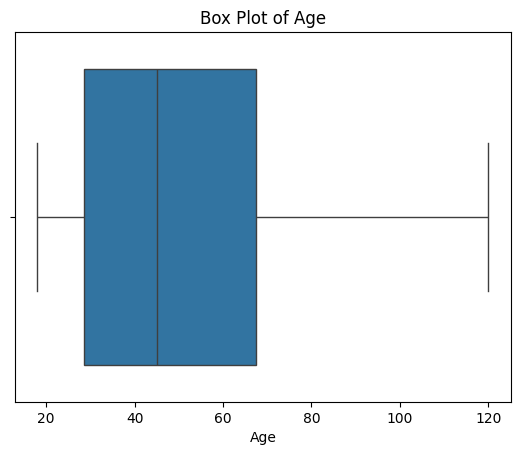

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data with an outlier
df1 = pd.DataFrame({'Age': [18, 22, 35, 45, 60, 75, 120]})  # 120 is an outlier

sns.boxplot(x=df1['Age'])
plt.title("Box Plot of Age")
plt.show()